<h2 style="color:#008080;">Data Mining Project</h2>

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading and inspecting the datasets

In [226]:
customers = pd.read_csv('DM_AIAI_CustomerDB.csv')

In [227]:
flights = pd.read_csv('DM_AIAI_FlightsDB.csv')

In [228]:
customers.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [229]:
flights.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


## Customers Dataset

### Initial Exploratory Data Analysis 

In this section, we explore the structure, quality, and distribution of the data.
We use descriptive statistics and visualizations to better understand patterns
and potential relationships between variables.

In [230]:
customers.shape

(16921, 21)

The costumers dataset consists of 16921 observations and 21 variables.

In [231]:
customers.columns

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

The first variable "Unnamed:0" is a mistake so there are only 20 variables.

In [232]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [233]:
customers.dtypes

Unnamed: 0                   int64
Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object


- The variables "EnrollmentDateOpening" and "CancellationDate" should be datetime

In [234]:
customers.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,NaN,NaN,NaN,8440.023639,4884.775439,0.0,4210.0,8440.0,12670.0,16900.0
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Deon,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Cecilia Householder,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578


In [235]:
# Basic statistics of the numeric variables that are more relevant
# It doesn't make sense to do this for the variables "Unnamed" and "Loyalty", for example

customers[['Income', 'Customer Lifetime Value']].describe()

,Income,Customer Lifetime Value
count,16901.000000,16901.000000
mean,37758.038400,7990.460188
std,30368.992499,6863.173093
min,0.000000,1898.010000
25%,0.000000,3979.720000
50%,34161.000000,5780.180000
75%,62396.000000,8945.690000
max,99981.000000,83325.380000


In [236]:
# Basic statistics for cathegorical variabels

customers.describe(include="object")

,First Name,Last Name,Customer Name,Country,Province or State,City,Postal code,Gender,Education,Location Code,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,EnrollmentType
count,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,2310,16921
unique,4941,15404,16921,1,11,29,75,2,5,3,3,3,2449,1260,2
top,Deon,Salberg,Cecilia Householder,Canada,Ontario,Toronto,V6E 3D9,female,Bachelor,Suburban,Married,Star,4/3/2015,7/7/2020,Standard
freq,13,4,1,16921,5468,3390,917,8497,10586,5716,9842,7761,34,8,15773


In [237]:
# they are all from Canada

In [238]:
## outliers ??

###   Missing values

In [239]:
customers.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [240]:
# We know that the total number of rows is 16921

# CancellationDate:  NA's = 14611

# So, in total, 2310 people canceled

In [241]:
customers[customers['Income'].isna()]


,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,9,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,...,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


###  Duplicates

In [242]:
# Checking for duplicated observations
customers.duplicated().sum()

0

### Initial Data Preparation

### - Deleting variables that aren't relevant

In [243]:
# We deleted the first row of the custoemrs dataset (Unnamed) because we don't need it (we already have the indexes by default)

# We also deleted the names columns because we already have the loyalty# column to identify each customer

# We also deleted the country column because they are all from Canada

In [244]:
customers = customers.drop(['Unnamed: 0', 'First Name', 'Last Name', 'Customer Name', 'Country'], axis=1)


In [245]:
display(customers)

,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,100012,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,100013,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,100014,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,100015,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard


### - Converting the variables 'EnrollmentDateOpening' and 'CancellationDate' to datetime

In [246]:
customers['EnrollmentDateOpening'] = pd.to_datetime(customers['EnrollmentDateOpening'])
customers['CancellationDate'] = pd.to_datetime(customers['CancellationDate'], errors='coerce')

In [247]:
customers[['EnrollmentDateOpening', 'CancellationDate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EnrollmentDateOpening  16921 non-null  datetime64[ns]
 1   CancellationDate       2308 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 264.5 KB


### Visualizations:

### - Numeric Variables

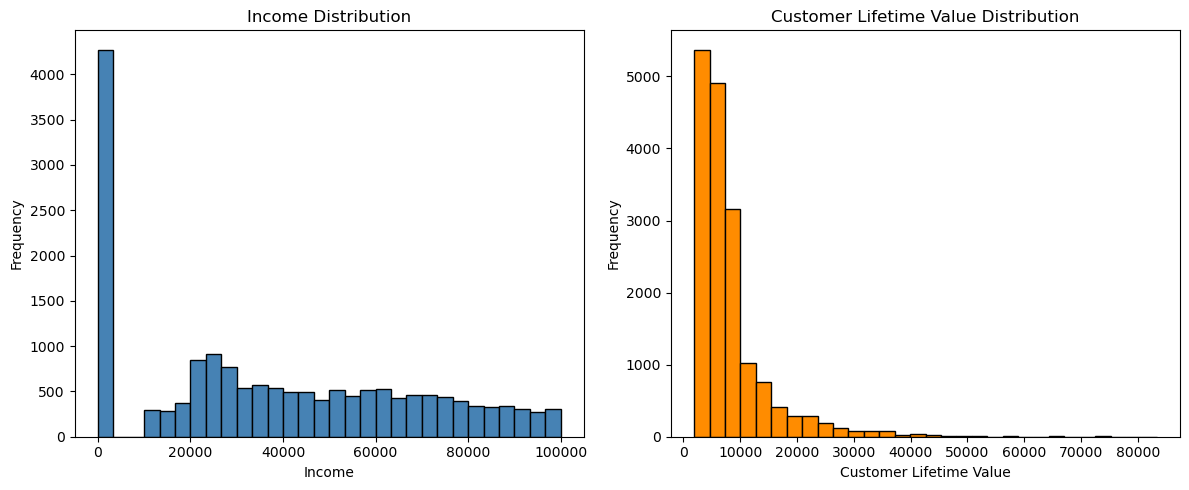

In [248]:
# Comparative histograms (Income vs Customer Lifetime Value)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].hist(customers['Income'], bins=30, color='steelblue', edgecolor='black')
axes[1].hist(customers['Customer Lifetime Value'], bins=30, color='darkorange', edgecolor='black')

axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Customer Lifetime Value Distribution')
axes[1].set_xlabel('Customer Lifetime Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


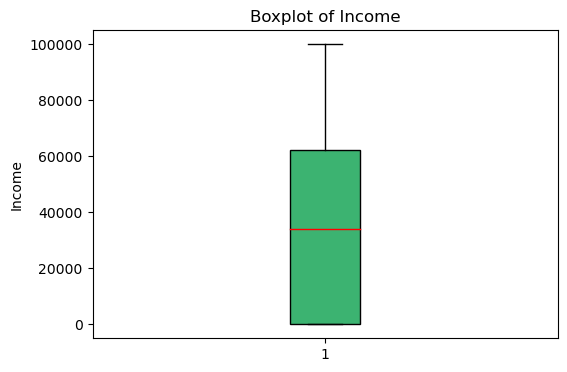

In [252]:
# Boxplot of Income
plt.figure(figsize=(6,4))
plt.boxplot(customers['Income'].dropna().values,  # <-- aqui o segredo
            patch_artist=True,
            boxprops=dict(facecolor='mediumseagreen', color='black'),
            medianprops=dict(color='red'))
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()


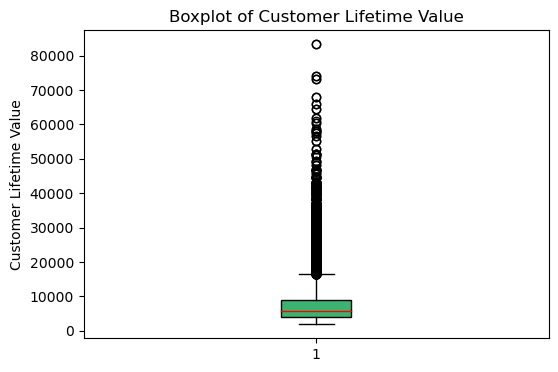

In [253]:
# Boxplot of Customer Lifetime Value
plt.figure(figsize=(6,4))
plt.boxplot(customers['Customer Lifetime Value'].dropna().values,
            patch_artist=True,
            boxprops=dict(facecolor='mediumseagreen', color='black'),
            medianprops=dict(color='red'))
plt.title('Boxplot of Customer Lifetime Value')
plt.ylabel('Customer Lifetime Value')
plt.show()

### - Categorical Variables

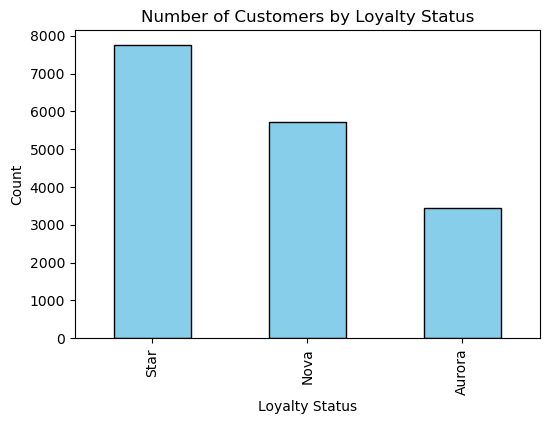

In [213]:
# Bar chart: Loyalty Status
plt.figure(figsize=(6,4))
customers['LoyaltyStatus'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count')
plt.show()


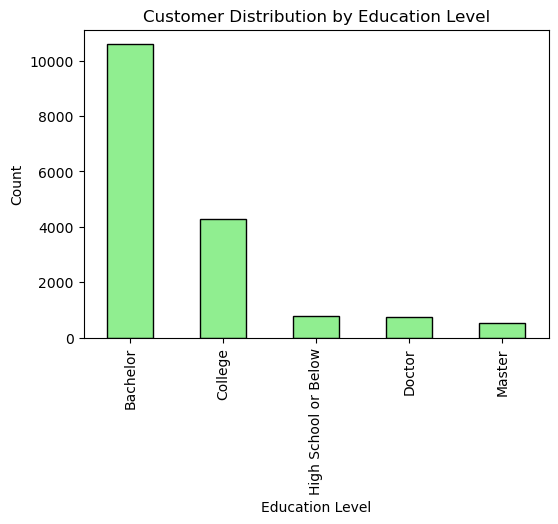

In [214]:
# Bar chart: Education
plt.figure(figsize=(6,4))
customers['Education'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Customer Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


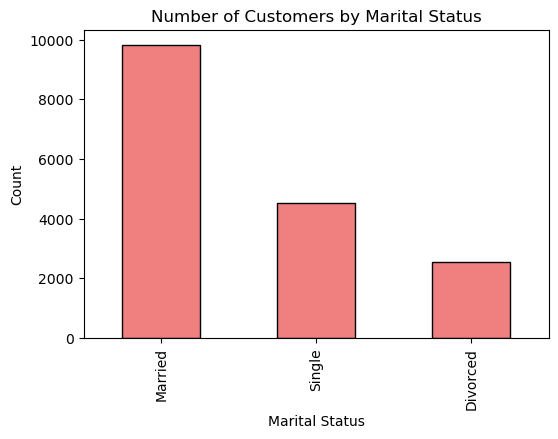

In [215]:
# Bar chart: Marital Status
plt.figure(figsize=(6,4))
customers['Marital Status'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Relationships between variables

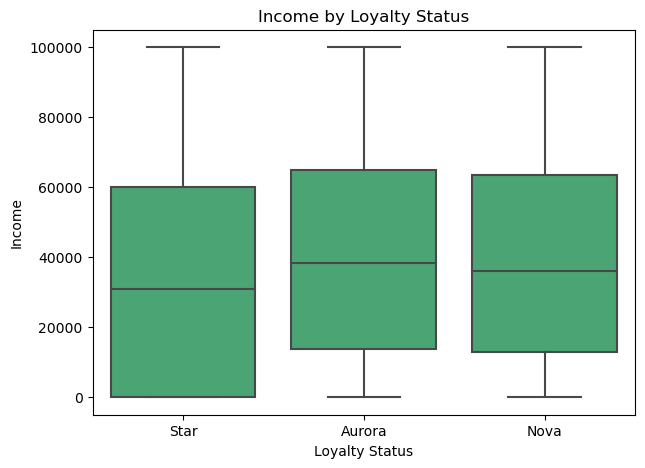

In [218]:
# Boxplot - Income by Loyalty Status
plt.figure(figsize=(7,5))
sns.boxplot(data=customers, x='LoyaltyStatus', y='Income', color='mediumseagreen')  # cor única
plt.title('Income by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Income')
plt.show()


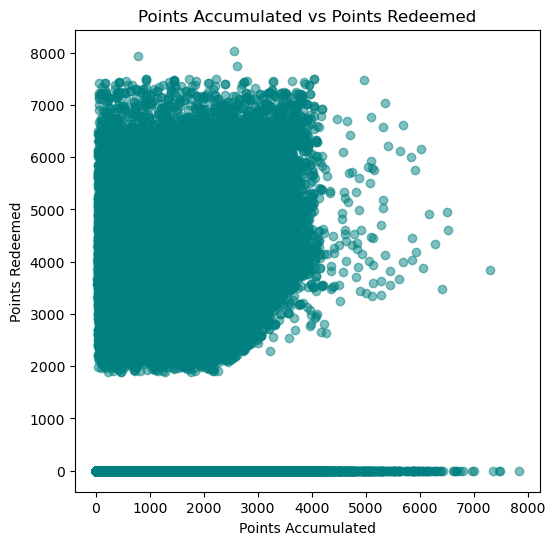

In [219]:
# Scatter plot - Points Accumulated vs Points Redeemed
plt.figure(figsize=(6,6))
plt.scatter(flights['PointsAccumulated'], flights['PointsRedeemed'], alpha=0.5, color='teal')
plt.title('Points Accumulated vs Points Redeemed')
plt.xlabel('Points Accumulated')
plt.ylabel('Points Redeemed')
plt.show()

### Flights Dataset:

In [184]:
flights.shape

(608436, 10)

The flights dataset consists of 608436 observations and 10 variables.

In [185]:
flights.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

In [186]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [187]:
flights.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object


- The variable "YearMonthDate" should be datetime

In [188]:
flights[['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
         'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']].describe()


,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000
mean,3.908107,0.983944,7939.341419,793.777781,235.251678,2.324835
std,5.057889,2.003785,10260.421873,1025.918521,983.233374,9.725168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,856.400000,85.275000,0.000000,0.000000
75%,7.200000,0.900000,15338.175000,1533.712500,0.000000,0.000000
max,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


##### General flight activity:

- The dataset contains 608,436 monthly flight records across all customers.

- On average, customers take about 3.9 flights per month, but the standard deviation (5.05) shows high variation — some customers fly very frequently, while many don’t fly at all in a given month.

- The median (50%) = 0 flights, meaning most customers don’t fly every month — many have months with no activity.

##### Flights with companions:

- The mean of 0.98 flights with companions per month indicates that, on average, customers take about one flight with others per month.

- The maximum of 11 shows that some customers frequently travel with family or colleagues.

- Combined with the previous point, this suggests that group travel is relatively common but varies widely between customers.

##### Distance travelled:

- The average monthly distance is around 7,939 km, but the maximum reaches 42,040 km — clear evidence of long-haul frequent flyers.

- The median (856 km) suggests most customers fly short or medium routes, with a few travelling very long distances.

- This points to two broad behavioural groups:

     - short-distance or regional travellers, and

     - long-distance frequent flyers (possibly business or premium customers).

##### Points accumulated and redeemed:

- Customers accumulate ~794 points per month on average, but redeem only ~235 — meaning most customers earn more than they spend.

- The median for both is 0, showing that in many months, customers neither earn nor redeem points (no flight activity).

- The maximum accumulated = 4204 and redeemed = 7496 indicate a few very active loyalty members.

- The low average redemption suggests that many customers save their points over time, possibly for larger rewards.

##### Monetary value of redeemed points:

- The average dollar cost of redeemed points is about $2.32 per month — very small compared to potential ticket prices.

- This again confirms that redeeming points is relatively infrequent, and most point balances are being accumulated.

#### Summary:

- Most customers don’t fly every month, but there is a small group of highly active travellers.

- Flight frequency and distance are heavily skewed, showing a mix of occasional and heavy users.

- Point accumulation exceeds redemption, suggesting latent loyalty value that the airline could leverage (e.g., campaigns to encourage point spending).

- Some customers travel long distances or frequently with companions, likely representing premium or family-oriented segments.

### - Missing values

In [189]:
flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [190]:
# Making sure that there are really no missing values in this dataset

# replace "" by nans
flights.replace("", np.nan, inplace=True)

# count of missing values
flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

### - Duplicates

In [191]:
# Checking for duplicated observations
flights.duplicated().sum()

2903

In [192]:
# Checking for rows with the same client (loyalty#), year and month
# But the other columns don't need to be the same

flights[flights.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)]


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
27,279419,2021,12,12/1/2021,12.0,0.0,11849.0,1184.00,0.0,0.0
171,990512,2021,12,12/1/2021,5.0,2.0,31991.0,3199.00,0.0,0.0
248,322169,2021,12,12/1/2021,2.0,0.0,17125.0,1712.00,0.0,0.0
297,106001,2021,12,12/1/2021,7.0,0.0,26469.0,2646.00,0.0,0.0
450,727091,2021,12,12/1/2021,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608249,989528,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608263,990512,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608264,990512,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608298,992168,2019,12,12/1/2019,11.7,4.5,2987.1,298.71,0.0,0.0


In [193]:
# Removing all duplicates (2903)
flights = flights.drop_duplicates()


In [194]:
flights.duplicated().sum()


0

This doesn’t mean there are 11,772 duplicate rows, it means that there are 11,772 rows that belong to duplicate groups (customers who appear more than once within the same year and month).

In [195]:
# Checking if there are still cases of clients with multiple rows in the same year and month

flights.duplicated(subset=['Loyalty#', 'Year', 'Month']).sum()


3001

Apesar de já teres removido as duplicadas exatas,
ainda restam alguns casos onde o mesmo cliente aparece várias vezes no mesmo mês —
mas com valores ligeiramente diferentes (ex.: NumFlights, DistanceKM, etc.).

In [196]:
# Checking if those duplicates have real values or zeros

dups = flights[flights.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)]
dups.describe()


,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000
mean,572520.167779,2020.093396,6.773682,5.828019,1.506921,12177.953719,1217.557347,340.659239,3.366861
std,270337.722199,0.830175,3.423071,5.139190,2.324412,10489.264115,1048.831644,1163.721125,11.510373
min,101902.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328623.000000,2019.000000,4.000000,0.900000,0.000000,1121.000000,111.500000,0.000000,0.000000
50%,585756.000000,2020.000000,7.000000,5.000000,0.000000,11190.000000,1118.970000,0.000000,0.000000
75%,825517.000000,2021.000000,10.000000,9.900000,2.700000,20549.000000,2054.842500,0.000000,0.000000
max,992168.000000,2021.000000,12.000000,21.000000,11.000000,41571.000000,4157.000000,7386.000000,73.000000


We can conclude that these duplicates are useful rows, not rows with zeros.
So, these aren't errors, they are probabibly differnt flights that weren't aggregated.

In [197]:
# Aggregating the duplicates 
# Sum of the numeric variables so we can have an unique row for each client per month
# We could've removed the duplicates, but that doesn't make sense
# Like this we are not loosing information 

flights = flights.groupby(['Loyalty#', 'Year', 'Month'], as_index=False).agg({
    'YearMonthDate': 'first',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DollarCostPointsRedeemed': 'sum'
})


In [198]:
flights.duplicated(subset=['Loyalty#', 'Year', 'Month']).sum()


0

After checking the duplicated monthly entries, we found that these records contain real flight activity (non-zero values for flights, distance, and points).
Therefore, instead of removing them, we aggregated all duplicates by customer, year, and month — summing their numeric values to obtain one consolidated record per customer-month.
This preserves all flight information while ensuring data consistency for further analysis.

Check again, maybe we need to remove one of the lines, instead of adding them

### Initial Data Preparation:

#### Converting the variables 'YearMonthDate':

In [222]:
flights['YearMonthDate'] = pd.to_datetime(flights['YearMonthDate'])

In [223]:
flights[['YearMonthDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602532 entries, 0 to 602531
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   YearMonthDate  602532 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


### Visualizations:

#### Numeric Variables

### - Flights Dataset

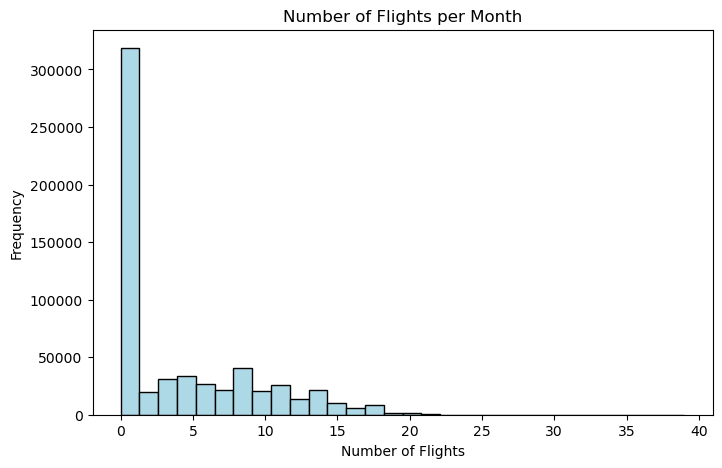

In [210]:
# Histogram of Number of Flights per Month
plt.figure(figsize=(8,5))
plt.hist(flights['NumFlights'], bins=30, color='lightblue', edgecolor='black')
plt.title('Number of Flights per Month')
plt.xlabel('Number of Flights')
plt.ylabel('Frequency')
plt.show()


### Interpretation: 

- This chart shows the distribution of the number of flights per month (NumFlights).

- The vast majority of records are concentrated between 0 and 2 flights per month.

- The peak at 0 indicates that many customers do not fly every month (or have inactive months).

- As the number of flights increases, the count of customers drops sharply.

- Only a few customers make more than 10 flights per month, and a very small group reaches up to 20.


This represents a right-skewed distribution, typical of airline data:

- Most customers are low-frequency flyers who travel occasionally.

- A small group of frequent flyers (likely business travelers) accounts for a large share of total flight activity.

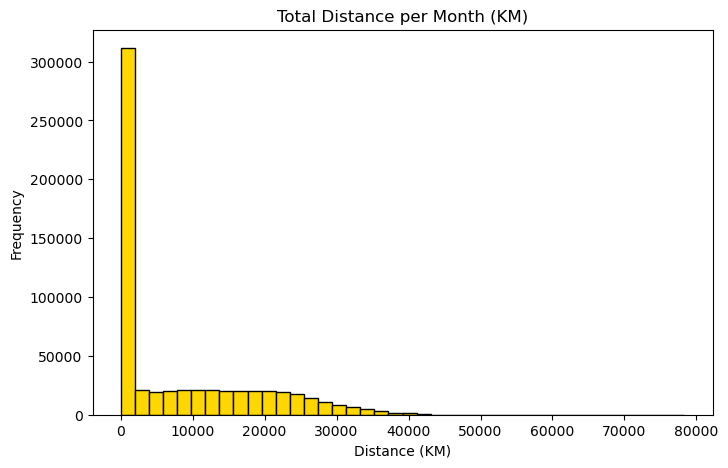

In [211]:
# Histogram of Total Distance per Month (KM)
plt.figure(figsize=(8,5))
plt.hist(flights['DistanceKM'], bins=40, color='gold', edgecolor='black')
plt.title('Total Distance per Month (KM)')
plt.xlabel('Distance (KM)')
plt.ylabel('Frequency')
plt.show()


### Interpretation:

This chart shows the distribution of total distance traveled per month (in kilometers) (DistanceKM).

- Most records are heavily concentrated near zero, meaning that most customers either fly short distances or do not fly every month.

- The distribution has a long right tail, reaching up to around 40,000 km per month, representing a small group of frequent long-distance travelers.

- The shape is highly right-skewed, indicating that flight distances vary widely across customers.

- This suggests:

     - The majority of customers take short or occasional flights (e.g., domestic or regional routes).

     - A small number of long-haul frequent flyers account for a significant portion of total kilometers flown.


Conclusion:

- The airline has a large base of low-activity customers and a smaller, high-value group that travels long distances regularly.

- This is typical for airline data and can be used later to segment customers into “short-haul” vs. “long-haul” traveler groups.

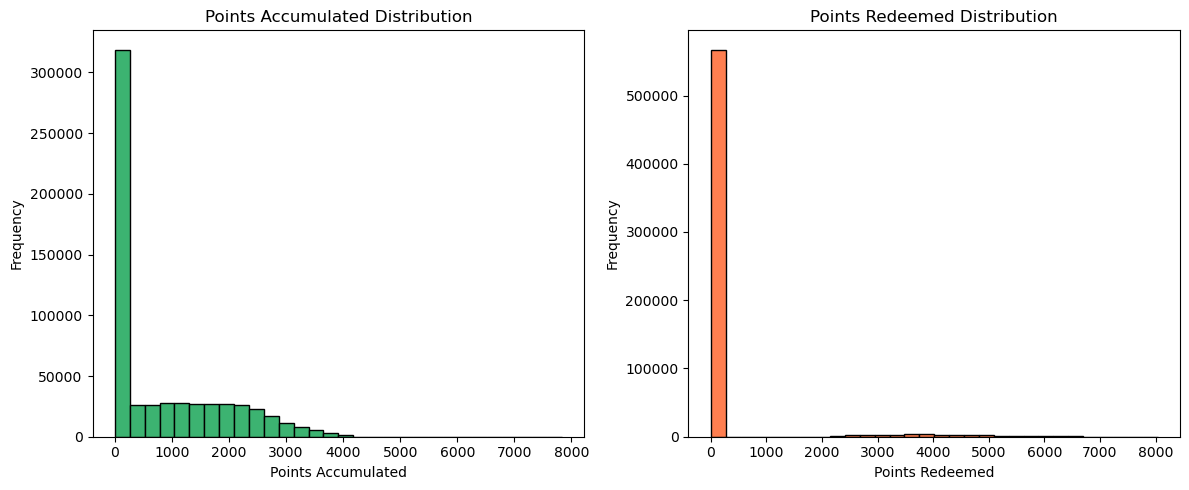

In [212]:
# Comparative histograms (Points Accumulated vs Points Redeemed)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].hist(flights['PointsAccumulated'], bins=30, color='mediumseagreen', edgecolor='black')
axes[1].hist(flights['PointsRedeemed'], bins=30, color='coral', edgecolor='black')

axes[0].set_title('Points Accumulated Distribution')
axes[0].set_xlabel('Points Accumulated')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Points Redeemed Distribution')
axes[1].set_xlabel('Points Redeemed')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

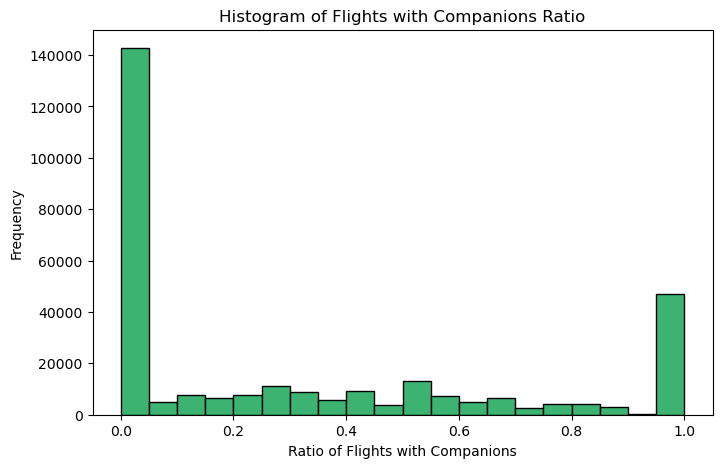

In [220]:
# Create Companion Ratio variable
# This variable represents the proportion of flights the customer goes to with company

flights['CompanionRatio'] = flights['NumFlightsWithCompanions'] / flights['NumFlights'].replace(0, np.nan)

# Histogram of Flights with Companions Ratio
plt.figure(figsize=(8,5))
plt.hist(flights['CompanionRatio'].dropna(), bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Histogram of Flights with Companions Ratio')
plt.xlabel('Ratio of Flights with Companions')
plt.ylabel('Frequency')
plt.show()


Most customers have a Companion Ratio near 0, meaning they usually travel alone.  
A smaller number of customers have ratios between 0.2 and 0.8, indicating they sometimes fly with companions.  
Only a few customers always fly with companions (ratio close to 1).


### Temporary Evolution

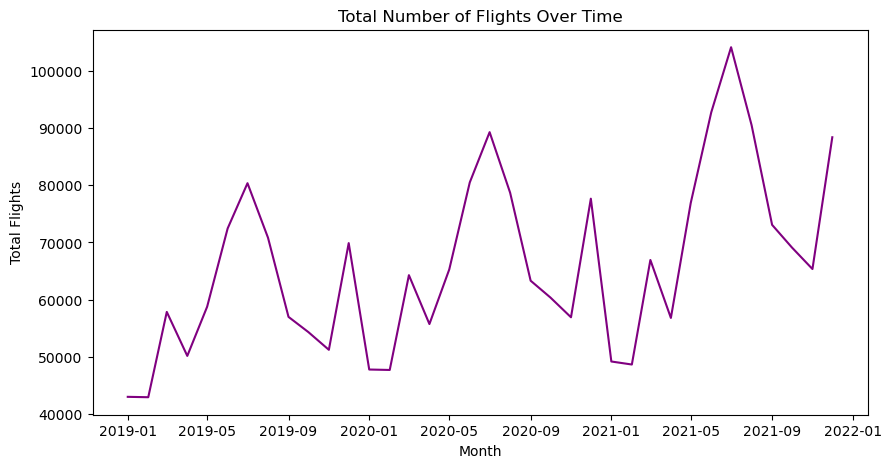

In [221]:
# Line chart - Total flights over time
flights_per_month = flights.groupby('YearMonthDate')['NumFlights'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(flights_per_month['YearMonthDate'], flights_per_month['NumFlights'], color='purple')
plt.title('Total Number of Flights Over Time')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.show()


In [66]:
flights.to_csv('flights_clean.csv', index=False)
